**Problema:** ¿Cuál será el precio de mercado recomendado para los productos que están en México?

In [ ]:
!pip install xlrd

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


##### **Overview**

Este dataset consiste en un conjunto de información de precios de los productos que se venden en México. El objetivo en sí, es recomendar que precio es mas economico dependiendo la zona en la que se encuentre el vendedor.


In [77]:
dataframe=pd.read_excel('D:\SaturdaysIA\EquipoCoral_RecoprecioIA\data_preprocessing\EDA\data\leer.xls',skiprows=7)

In [78]:
columns=dataframe.columns

In [79]:
dataframe.head()

Año  Mes  Fecha_Pub_DOF  Clave ciudad                  Nombre ciudad  \
0  2020   10            NaN             1  Área Met. de la Cd. de México   
1  2020   10            NaN             1  Área Met. de la Cd. de México   
2  2020   10            NaN             1  Área Met. de la Cd. de México   
3  2020   10            NaN             1  Área Met. de la Cd. de México   
4  2020   10            NaN             1  Área Met. de la Cd. de México   

                         División           Grupo  \
0  1. Alimentos, bebidas y tabaco  1.1. Alimentos   
1  1. Alimentos, bebidas y tabaco  1.1. Alimentos   
2  1. Alimentos, bebidas y tabaco  1.1. Alimentos   
3  1. Alimentos, bebidas y tabaco  1.1. Alimentos   
4  1. Alimentos, bebidas y tabaco  1.1. Alimentos   

                              Clase                        Subclase  \
0  1.1.1. Pan, tortillas y cereales  04 Arroz y cereales preparados   
1  1.1.1. Pan, tortillas y cereales  04 Arroz y cereales preparados   
2  1.1.1. Pan, tortillas y cereales  04 Arroz y cereales preparados   
3  1.1.1. Pan, tortillas y cereales  04 Arroz y cereales preparados   
4  1.1.1. Pan, tortillas y cereales  04 Arroz y cereales preparados   

   Clave generico Generico  Consecutivo  \
0               1    Arroz            1   
1               1    Arroz            2   
2               1    Arroz            3   
3               1    Arroz            4   
4               1    Arroz            5   

                                      Especificación  Precio promedio  \
0             VERDE VALLE, INTEGRAL, BOLSA DE 900 GR            32.00   
1    VERDE VALLE, BLANCO, SUPER EXTRA, BOLSA DE 1 KG            36.23   
2        MORELOS, BLANCO, SUPER EXTRA, BOLSA DE 1 KG            34.00   
3           MP, BLANCO, SUPER EXTRA, BOLSA DE 900 GR            21.94   
4  VALLE VERDE, BLANCO, SUPER EXTRA, BOLSA DE 900 GR            44.44   

   Cantidad Unidad Estatus  
0         1     KG     NaN  
1         1     KG     NaN  
2         1     KG     NaN  
3         1     KG     NaN  
4         1     KG     NaN

In [80]:
# Dimensiones del dataframe
dataframe.shape

(65528, 17)

In [81]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65528 entries, 0 to 65527
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              65528 non-null  int64  
 1   Mes              65528 non-null  int64  
 2   Fecha_Pub_DOF    0 non-null      float64
 3   Clave ciudad     65528 non-null  int64  
 4   Nombre ciudad    65528 non-null  object 
 5   División         65528 non-null  object 
 6   Grupo            65528 non-null  object 
 7   Clase            65528 non-null  object 
 8   Subclase         65528 non-null  object 
 9   Clave generico   65528 non-null  int64  
 10  Generico         65528 non-null  object 
 11  Consecutivo      65528 non-null  int64  
 12  Especificación   65528 non-null  object 
 13  Precio promedio  65528 non-null  float64
 14  Cantidad         65528 non-null  int64  
 15  Unidad           65528 non-null  object 
 16  Estatus          1226 non-null   object 
dtypes: float64(2

### 2. Características generales

##### 2.1 Relación de tipo de datos

Mostrando la proporción de tipos de datos en un gráfico circular

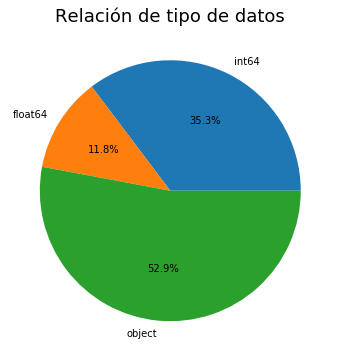

In [82]:
dtype, count = np.unique(dataframe.dtypes.values, return_counts=True)
df = pd.DataFrame(data={'count': count}, index=dtype)
ax = df.plot.pie(y='count', autopct="%1.1f%%", figsize=(6,6), legend=False)
ax.set_ylabel('')
ax.set_title('Relación de tipo de datos', fontsize=18);

##### 2.2 Valores faltantes

Mostrando la cantidad de los valores faltantes

In [83]:
# obteniendo el número de puntos de datos faltantes por columna
missing_values_count = dataframe.isnull().sum()
# Para observar el número de puntos faltantes en las primeras nueve columnas
missing_values_count[0:17]

Año                    0
Mes                    0
Fecha_Pub_DOF      65528
Clave ciudad           0
Nombre ciudad          0
División               0
Grupo                  0
Clase                  0
Subclase               0
Clave generico         0
Generico               0
Consecutivo            0
Especificación         0
Precio promedio        0
Cantidad               0
Unidad                 0
Estatus            64302
dtype: int64

### 3. Funciones numéricas

##### 3.1 Data Encoding: Label Encoder

Por defecto cualquier campo no numérico será de tipo 'object'

In [84]:
dataframe.dtypes

Año                  int64
Mes                  int64
Fecha_Pub_DOF      float64
Clave ciudad         int64
Nombre ciudad       object
División            object
Grupo               object
Clase               object
Subclase            object
Clave generico       int64
Generico            object
Consecutivo          int64
Especificación      object
Precio promedio    float64
Cantidad             int64
Unidad              object
Estatus             object
dtype: object

Las **características categóricas** toman un número fijo de valores. Cada uno de estos valores asigna una observación a un grupo correspondiente, conocido como categoría, que refleja alguna propiedad cualitativa de este ejemplo. 

In [85]:
# columnas categoricas
dataframe.dtypes == object

Año                False
Mes                False
Fecha_Pub_DOF      False
Clave ciudad       False
Nombre ciudad       True
División            True
Grupo               True
Clase               True
Subclase            True
Clave generico     False
Generico            True
Consecutivo        False
Especificación      True
Precio promedio    False
Cantidad           False
Unidad              True
Estatus             True
dtype: bool

In [86]:
# columnas númericas
dataframe.dtypes == float

Año                False
Mes                False
Fecha_Pub_DOF       True
Clave ciudad       False
Nombre ciudad      False
División           False
Grupo              False
Clase              False
Subclase           False
Clave generico     False
Generico           False
Consecutivo        False
Especificación     False
Precio promedio     True
Cantidad           False
Unidad             False
Estatus            False
dtype: bool

Dado que se tienen texto en las columnas de interes, se procede a generar el reemplazo de los valores categóricos (textuales) por los valores númericos, por lo que se utilizar el Label Encoder, el cual se va a encargar de agrupar de forma que los registros cuenten con la misma palabra para poder identificarlos por un númeral.

In [87]:
# Categorical boolean mask, de esta forma realizamos un cambio al tipo de dato
# lo 'enmascaramos' como un tipo categórico para poderlo tratar.
categorical_feature_mask = dataframe.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dataframe.columns[categorical_feature_mask].tolist()

In [88]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()
# A cada columna de tipo categórica le aplicamos la transformación
# bien podríamos realizarlo con una columna en específico de forma:
# df['ColumnaNueva'] = le.fit_transform(bridge_df['ColumnaAnterior'])
dataframe[['Nombre ciudad','División','Grupo','Clase','Subclase','Generico','Especificación', 'Unidad']] = dataframe[['Nombre ciudad','División','Grupo','Clase','Subclase','Generico','Especificación', 'Unidad']].apply(lambda col: le.fit_transform(col))
dataframe[['Nombre ciudad','División','Grupo','Clase','Subclase','Generico','Especificación', 'Unidad']].tail(10)

Nombre ciudad  División  Grupo  Clase  Subclase  Generico  \
65518             34         2      5     17        42       138   
65519             34         2      5     17        42       138   
65520             34         2      5     17        42       138   
65521             34         2      5     17        42       138   
65522             34         2      6     18        45         9   
65523             34         2      6     18        45         9   
65524             34         2      6     18        45         9   
65525             34         2      6     18        45         9   
65526             34         2      6     18        45        14   
65527             34         2      6     18        45        14   

       Especificación  Unidad  
65518           26443      30  
65519           14868      30  
65520           26427      30  
65521            3725      30  
65522           36846      22  
65523            7886      11  
65524           12022      22  
65525            6275      22  
65526           35573      11  
65527            6256      11

In [89]:
dataframe.head()

Año  Mes  Fecha_Pub_DOF  Clave ciudad  Nombre ciudad  División  Grupo  \
0  2020   10            NaN             1             43         0      0   
1  2020   10            NaN             1             43         0      0   
2  2020   10            NaN             1             43         0      0   
3  2020   10            NaN             1             43         0      0   
4  2020   10            NaN             1             43         0      0   

   Clase  Subclase  Clave generico  Generico  Consecutivo  Especificación  \
0      0         3               1         7            1           36462   
1      0         3               1         7            2           36439   
2      0         3               1         7            3           23385   
3      0         3               1         7            4           23554   
4      0         3               1         7            5           36212   

   Precio promedio  Cantidad  Unidad Estatus  
0            32.00         1      12     NaN  
1            36.23         1      12     NaN  
2            34.00         1      12     NaN  
3            21.94         1      12     NaN  
4            44.44         1      12     NaN

In [90]:
dataframe[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65528 entries, 0 to 65527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nombre ciudad   65528 non-null  int32 
 1   División        65528 non-null  int32 
 2   Grupo           65528 non-null  int32 
 3   Clase           65528 non-null  int32 
 4   Subclase        65528 non-null  int32 
 5   Generico        65528 non-null  int32 
 6   Especificación  65528 non-null  int32 
 7   Unidad          65528 non-null  int32 
 8   Estatus         1226 non-null   object
dtypes: int32(8), object(1)
memory usage: 2.5+ MB


##### 3.2 Importancia de las funciones

Mostrando la importancia de las características en un gráfico de barras y los datos numéricos y categóricos están codificados por colores

In [91]:
# Descripción estadistica
dataframe.describe()

Año      Mes  Fecha_Pub_DOF  Clave ciudad  Nombre ciudad  \
count  65528.0  65528.0            0.0  65528.000000   65528.000000   
mean    2020.0     10.0            NaN     20.964702      22.227140   
std        0.0      0.0            NaN     13.314300      13.231954   
min     2020.0     10.0            NaN      1.000000       0.000000   
25%     2020.0     10.0            NaN      9.000000      10.000000   
50%     2020.0     10.0            NaN     21.000000      23.000000   
75%     2020.0     10.0            NaN     33.000000      34.000000   
max     2020.0     10.0            NaN     44.000000      43.000000   

           División         Grupo         Clase      Subclase  Clave generico  \
count  65528.000000  65528.000000  65528.000000  65528.000000    65528.000000   
mean       0.590358      1.584529      8.175009     23.175559       96.597424   
std        0.795387      2.182915      5.994451     14.043699       66.809207   
min        0.000000      0.000000      0.000000      0.000000        1.000000   
25%        0.000000      0.000000      3.000000     12.000000       43.000000   
50%        0.000000      0.000000      6.000000     20.000000       87.000000   
75%        1.000000      2.000000     13.000000     36.000000      133.000000   
max        2.000000      6.000000     19.000000     47.000000      294.000000   

           Generico   Consecutivo  Especificación  Precio promedio  Cantidad  \
count  65528.000000  65528.000000    65528.000000     65528.000000   65528.0   
mean      96.418005      7.045828    18050.519640       664.151854       1.0   
std       55.151602     10.706662    11329.904489      2459.623632       0.0   
min        0.000000      1.000000        0.000000         0.420000       1.0   
25%       46.000000      2.000000     7804.750000        31.090000       1.0   
50%       99.000000      4.000000    18009.500000        84.410000       1.0   
75%      146.000000      8.000000    27839.250000       240.000000       1.0   
max      191.000000    187.000000    38326.000000     79443.000000       1.0   

             Unidad  
count  65528.000000  
mean      16.233412  
std        5.938004  
min        0.000000  
25%       12.000000  
50%       12.000000  
75%       22.000000  
max       32.000000

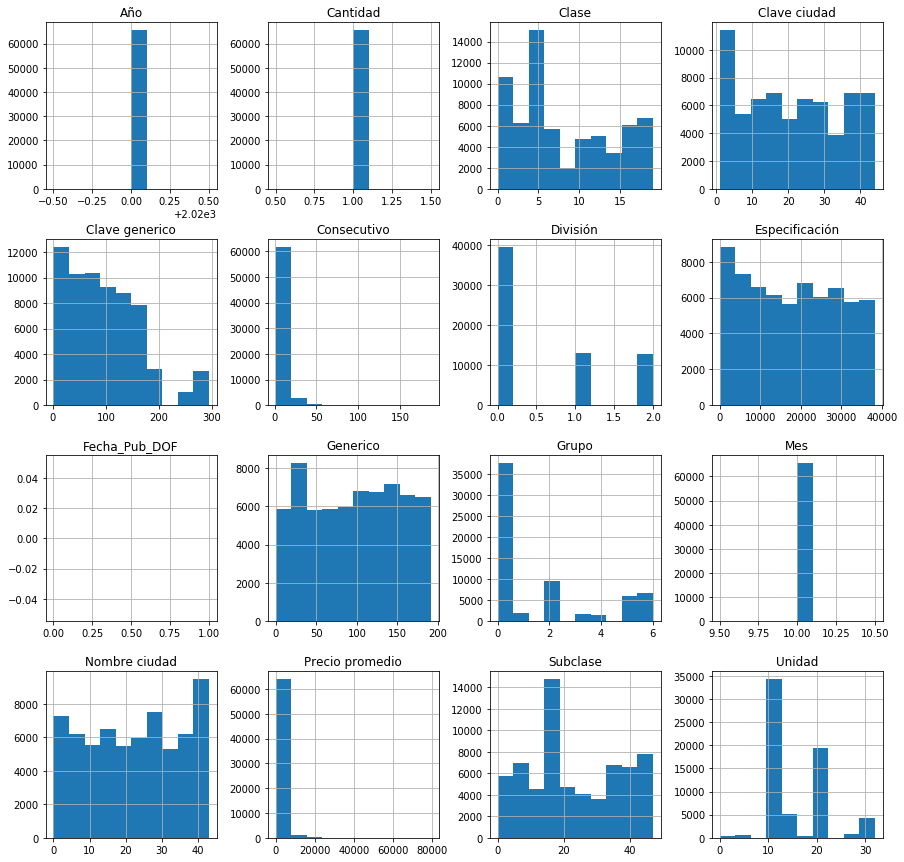

In [92]:
# Visualizando los datos
dataframe.hist(figsize = (15,15))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

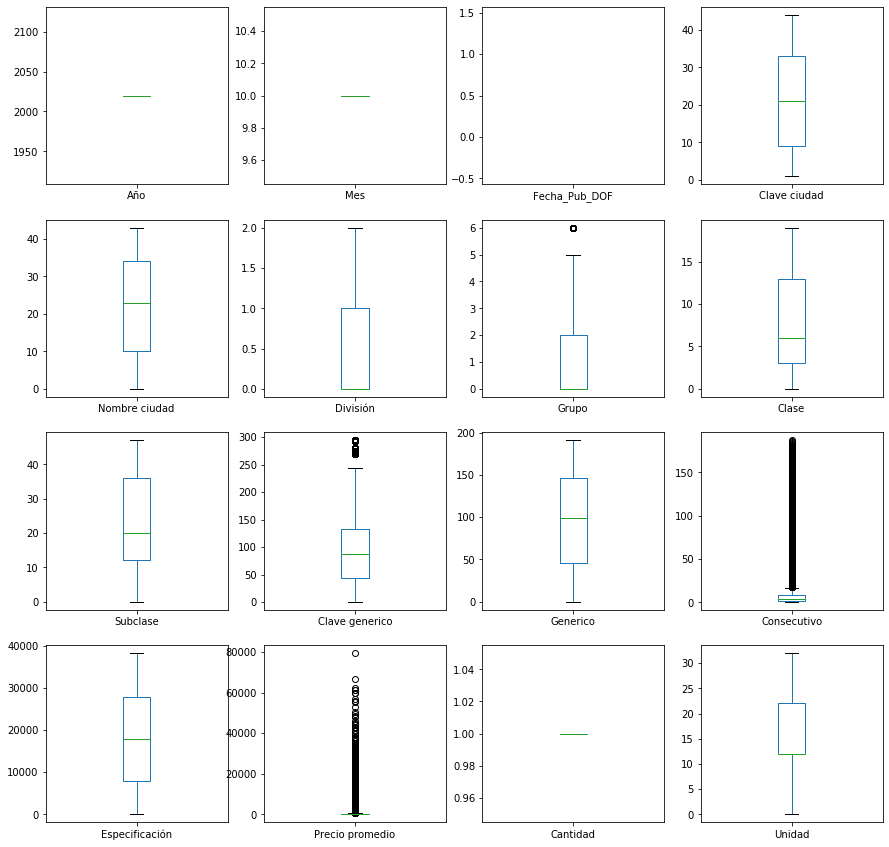

In [93]:
#Diagrama de cajas 
dataframe.plot(kind='box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,15))
plt.show